In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns

import nltk

In [30]:
def remove_punctuation(text):
    """Removes punctuation."""
    acceptable = ['£','%']
    text = text.replace('\n', " ").replace('\t','').replace('\r','')
    clean_chars = [char.lower() for char in text if char.isalnum() or char.isspace() or (char in acceptable)]
    return "".join(clean_chars)


def csv_to_data_frame(file_name):  
    """Coverts a csv into a pandas DataFrame"""
    return pd.read_csv(file_name, engine='python')  




In [31]:
data = csv_to_data_frame('data/data_file_1.csv')

In [32]:
#Let's start by cleaning the content column 
data['content_edited'] = data['content'].apply(lambda x : remove_punctuation(x))

## Word Tokenization

Word tokenizer breaks text paragraph into words.Let's proceed to convert the content into tokens

In [33]:
from nltk.tokenize import word_tokenize

data['content_edited'] = data['content_edited'].apply(lambda x : word_tokenize(x))

data['content_edited'].head()

0    [planned, our, entire, house, move, around, wh...
1    [woeful, abysmal, customer, service, they, wan...
2    [bt, have, the, worst, customer, service, i, h...
3    [overall, my, experience, has, been, good, we,...
4    [bt, are, awful, terrible, communication, i, w...
Name: content_edited, dtype: object

## Stopwords

Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc

In NLTK for removing stopwords, we need to create a list of stopwords and filter out your list of tokens from these words.

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords

# List of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Remove stopwords
data['content_edited'] = data['content_edited'].apply(lambda x: [item for item in x if item not in stopwords])

data['content_edited'].head()


0    [planned, entire, house, move, around, bt, cou...
1    [woeful, abysmal, customer, service, wanted, r...
2    [bt, worst, customer, service, ever, come, acr...
3    [overall, experience, good, havent, used, gami...
4    [bt, awful, terrible, communication, wanted, l...
Name: content_edited, dtype: object

## Remove invalid words

In [36]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
words1 = set(nltk.corpus.words.words())
words2 = set(nltk.corpus.wordnet.words())
words = set.union(words1, words2)

data['content_edited'] = data['content_edited'].apply(lambda x:[item for item in x if item in words])
data['content_edited'].head()

0    [planned, entire, house, move, around, could, ...
1    [woeful, abysmal, customer, service, wanted, r...
2    [worst, customer, service, ever, come, across,...
3    [overall, experience, good, havent, used, brow...
4    [awful, terrible, communication, wanted, leave...
Name: content_edited, dtype: object

In [39]:
data['content_edited'] = data['content_edited'].apply(lambda x: ' '.join([item for item in x]))

data['content_edited'].head()

0    planned entire house move around could connect...
1    woeful abysmal customer service wanted return ...
2    worst customer service ever come across one ma...
3         overall experience good havent used browsing
4    awful terrible communication wanted leave anot...
Name: content_edited, dtype: object

## Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. 
It transforms root word with the use of vocabulary and morphological analysis.

In [40]:
from nltk.stem.wordnet import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

data['content_edited'] = data['content_edited'].apply(wordnet_lem.lemmatize)

data['content_edited'].head()

0    planned entire house move around could connect...
1    woeful abysmal customer service wanted return ...
2    worst customer service ever come across one ma...
3         overall experience good havent used browsing
4    awful terrible communication wanted leave anot...
Name: content_edited, dtype: object

## Word cloud

In [41]:
all_words = ' '.join([word for word in data['content_edited']])

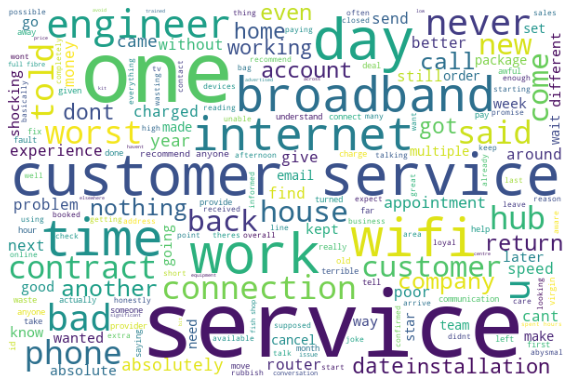

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",
                     width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');


## Frequency distributions

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

In [45]:
#Most common words
fd.most_common(3)

[('service', 41), ('customer', 31), ('one', 22)]

In [46]:
# Plot common words
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

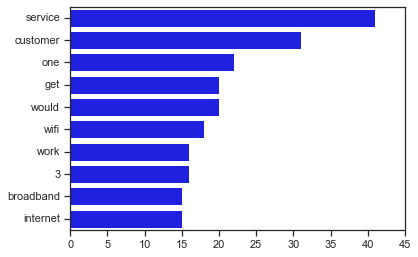

In [47]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

## Collocations 

Trigrams: Frequent three-word combinations

In [48]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(words)

In [49]:
finder.ngram_fd.most_common(5)

[(('abysmal', 'customer', 'service'), 2),
 (('customer', 'service', 'ever'), 2),
 (('would', 'recommend', 'anyone'), 2),
 (('service', 'would', 'strongly'), 2),
 (('wifi', 'even', 'though'), 2)]

In [50]:
finder.ngram_fd.tabulate(5)

('abysmal', 'customer', 'service')    ('customer', 'service', 'ever')   ('would', 'recommend', 'anyone')   ('service', 'would', 'strongly')         ('wifi', 'even', 'though') 
                                 2                                  2                                  2                                  2                                  2 


## Using NLTK’s Pre-Trained Sentiment Analyzer

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

In [51]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/elizabetharevalo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [53]:
#Polarity scores
#Use the polarity_scores method:

data['polarity'] = data['content_edited'].apply(lambda x: analyzer.polarity_scores(x))
data['polarity'].head()

0    {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...
1    {'neg': 0.133, 'neu': 0.773, 'pos': 0.094, 'co...
2    {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp...
3    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
4    {'neg': 0.571, 'neu': 0.365, 'pos': 0.065, 'co...
Name: polarity, dtype: object

In [54]:
data = pd.concat(
    [data.drop(['polarity'], axis=1), 
     data['polarity'].apply(pd.Series)], axis=1)

In [55]:
data['sentiment'] = data['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

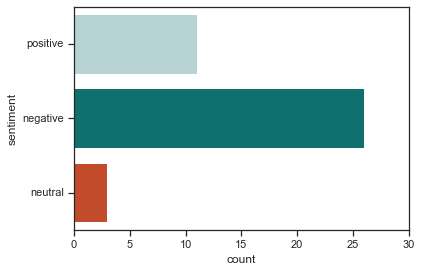

In [56]:
sns.countplot(y='sentiment', 
             data=data, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );